In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
from tensorflow.keras.models import load_model

In [3]:
loaded_model = tf.keras.models.load_model('C:/Users/aakas/Downloads/datasets all/TCC_model')

In [4]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 1800)              0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 1800, 32)          3200032   
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 128)              

In [5]:
text = "I think that you are a Faggot get a life and burn in Hell I hate you, im going to find out where u live and kill everyone of you"
predictions = loaded_model.predict(np.array([text])) > 0.5
prediction_text = ""
for i, col in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    prediction_text += f"{col:<{20}}: {predictions[0][i]:<{5}}\n"
print(prediction_text)

1/1 [==============================] - 1s 877ms/step
toxic               : 1    
severe_toxic        : 0    
obscene             : 1    
threat              : 1    
insult              : 1    
identity_hate       : 0    



In [6]:
text = "how are you"
predictions = loaded_model.predict(np.array([text])) > 0.5
prediction_text = ""
for i, col in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    prediction_text += f"{col:<{20}}: {predictions[0][i]:<{5}}\n"
print(prediction_text)

1/1 [==============================] - 0s 65ms/step
toxic               : 0    
severe_toxic        : 0    
obscene             : 0    
threat              : 0    
insult              : 0    
identity_hate       : 0    



In [9]:
text = "i am going to kill you"
predictions = loaded_model.predict(np.array([text])) > 0.5
prediction_text = ""
for i, col in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    prediction_text += f"{col:<{20}}: {predictions[0][i]:<{5}}\n"
print(prediction_text)

1/1 [==============================] - 0s 69ms/step
toxic               : 1    
severe_toxic        : 0    
obscene             : 0    
threat              : 1    
insult              : 0    
identity_hate       : 0    



In [12]:
text = "fuck off nigger"
predictions = loaded_model.predict(np.array([text])) > 0.5
for i, col in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    print(f"{col:<20}: {int(predictions[0][i])}")


1/1 [==============================] - 0s 173ms/step
toxic               : 1
severe_toxic        : 0
obscene             : 1
threat              : 0
insult              : 1
identity_hate       : 1


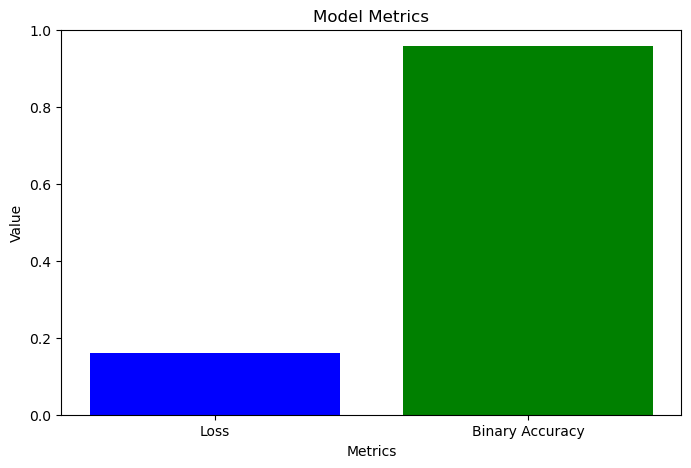

In [16]:
import matplotlib.pyplot as plt

loss = 0.1599
binary_accuracy = 0.9567

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(['Loss', 'Binary Accuracy'], [loss, binary_accuracy], color=['blue', 'green'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Metrics')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.show()

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_true = [1, 1, 1, 0, 0, 1]
y_pred = [1, 1, 0, 0, 0, 1]

# Calculated metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Outputs
print("Accuracy:", accuracy)  
print("Precision:", precision)  
print("Recall:", recall)  
print("F1 Score:", f1)  
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571
Confusion Matrix:
 [[2 0]
 [1 3]]


In [7]:
#app.py -> create flask app

In [13]:
from flask import Flask, request, jsonify
import numpy as np

app = Flask(__name__)

# Example function to mimic model prediction
def predict(text):
    # Example prediction code (replace with your actual prediction code)
    predictions = np.zeros(6)  # Assuming 6 classes
    prediction_text = ""
    for i, col in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
        prediction_text += f"{col:<{20}}: {predictions[i]:<{5}}\n"
    return prediction_text

@app.route('/classify', methods=['POST'])
def classify():
    data = request.get_json()
    text = data['text']

    # Call your prediction function
    prediction_text = predict(text)

    return jsonify({'prediction': prediction_text})

if __name__ == '__main__':
    app.run(debug=False, port=8000)  # Change port to 8000


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
127.0.0.1 - - [06/Apr/2024 17:15:24] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:15:24] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:15:30] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:15:44] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:15:45] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:19:07] "GET / HTTP/1.1" 404 -


In [19]:
from flask import Flask, send_file
import timeit
app = Flask(__name__)

@app.route('/')
def index():
    return send_file('C:/Users/aakas/Downloads/datasets all/index.html')

if __name__ == '__main__':
    app.run(debug=False, port=5001)  


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
127.0.0.1 - - [06/Apr/2024 17:25:21] "GET / HTTP/1.1" 304 -
127.0.0.1 - - [06/Apr/2024 17:25:21] "GET /script.js HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:25:24] "GET /?textInput=hbjv HTTP/1.1" 200 -
127.0.0.1 - - [06/Apr/2024 17:25:24] "GET /script.js HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:26:55] "GET /?textInput=hbjv HTTP/1.1" 200 -
127.0.0.1 - - [06/Apr/2024 17:26:55] "GET /static/script.js HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:26:57] "GET /?textInput=sadf HTTP/1.1" 200 -
127.0.0.1 - - [06/Apr/2024 17:26:57] "GET /static/script.js HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:37:05] "GET /?textInput=asd HTTP/1.1" 200 -
127.0.0.1 - - [06/Apr/2024 17:37:05] "GET /static/script.js HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:37:06] "GET /?textInput= HTTP/1.1" 200 -
127.0.0.1 - - [06/Apr/2024 17:37:06] "GET /static/script.js HTTP/1.1" 404 -
127.0.0.1 - - [06/Apr/2024 17:37:06] "GET /?textInput= HTTP/1.1" 304 -
